In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
%matplotlib inline

In [58]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
train["Num_Family"] = train["SibSp"] + train["Parch"]
male = train[train.Sex == "male"]

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [40]:
def create_pivot(data, indexes):
    return data.pivot_table(index=indexes, values="Survived").plot(kind="barh").axvline(x=0.5, linewidth=2, color='r')

In [41]:
def create_pivot_count(data, indexes):
    return data.pivot_table(index=indexes, values="Survived", aggfunc="count")

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

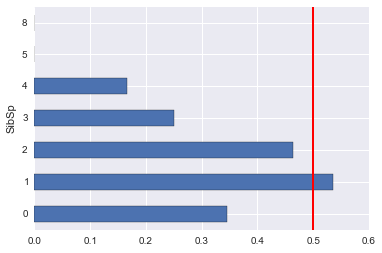

In [42]:
create_pivot(train, ["SibSp"])
create_pivot_count(train, ["SibSp"])

Sex     SibSp
female  0        174
        1        106
        2         13
        3         11
        4          6
        5          1
        8          3
male    0        434
        1        103
        2         15
        3          5
        4         12
        5          4
        8          4
Name: Survived, dtype: int64

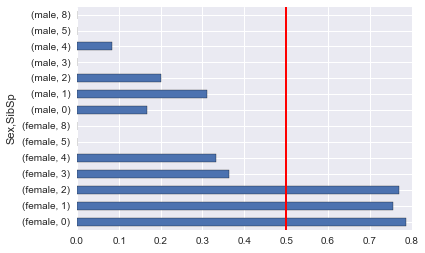

In [43]:
create_pivot(train, ["Sex", "SibSp"])
create_pivot_count(train, ["Sex", "SibSp"])

##Females with 0, 1, or 2 SibSp

Pclass
1     2
2     1
3    18
Name: Survived, dtype: int64

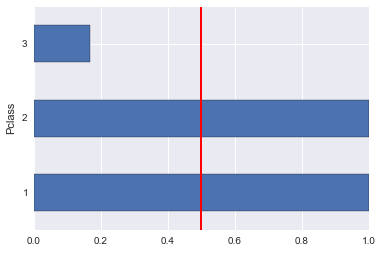

In [36]:
create_pivot(train[(train.Sex == "female") & (train.SibSp > 2)], ["Pclass"])
create_pivot_count(train[(train.Sex == "female") & (train.SibSp > 2)], ["Pclass"])

Sex     Num_Family
female  0             126
        1              87
        2              49
        3              19
        4              12
        5               8
        6               8
        7               2
        10              3
male    0             411
        1              74
        2              53
        3              10
        4               3
        5              14
        6               4
        7               4
        10              4
Name: Survived, dtype: int64

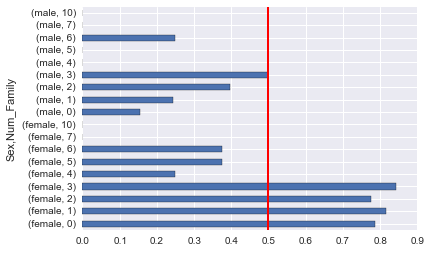

In [44]:
create_pivot(train, ["Sex", "Num_Family"])
create_pivot_count(train, ["Sex", "Num_Family"])

##Females with 0, 1, or 2 SibSp
##Females in First or Second Class
##Females with 3 or more Family Members
##Males with 3 Family Members

Pclass
1    23
2    19
3    51
Name: Survived, dtype: int64

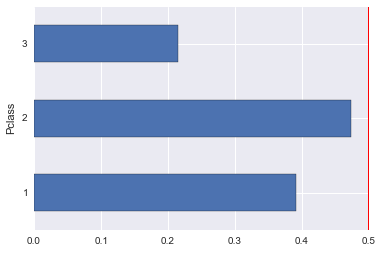

In [51]:
create_pivot(train[(train.Sex == "male") & (train.Parch >= 1)], ["Pclass"])
create_pivot_count(train[(train.Sex == "male") & (train.Parch >= 1)], ["Pclass"])

In [59]:
male_survivor = male
male_survivor.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,4


In [77]:
male_survivor.Fare.describe()
male_survivor["LowFare"] = (male_survivor.Fare < 30)
male_survivor["LowFare"] = male_survivor["LowFare"].apply(int)

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


LowFare
0    125
1    452
Name: Survived, dtype: int64

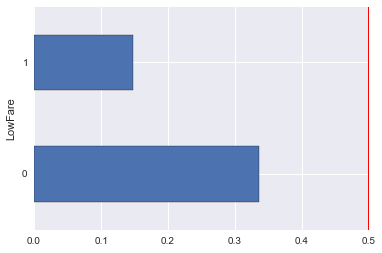

In [78]:
create_pivot(male_survivor, ["LowFare"])
create_pivot_count(male_survivor, ["LowFare"])